In [1]:
from image import AstroImage

In [2]:
img = AstroImage.read("../_data/calexp-NB0527-9813-4,4.fits", ext=1)


        Image information:
        ------------------
        Image shape: (119, 119) pixels <-> 19.992 x 19.992 arcsec
        Image center: 150.2614309, 2.2389649 (RA, Dec)
        Pixel scale: 0.168 arcsec/pixel
        

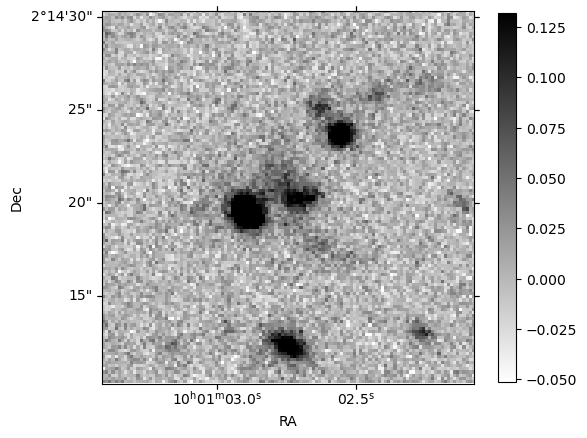

In [3]:
cutout = img.cutout(coord=[150.2614379, 2.2389596], size=20)
cutout


        Image information:
        ------------------
        Image shape: (179, 179) pixels <-> 30.072 x 30.072 arcsec
        Image center: 150.2549221, 2.2251345 (RA, Dec)
        Pixel scale: 0.168 arcsec/pixel
        

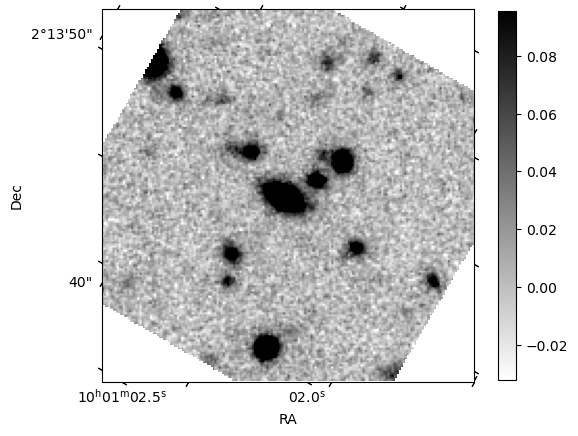

In [7]:
from astropy.wcs import WCS

coord = [150.2549675, 2.2251356]
cutout = img.cutout(coord=coord, size=30)
cutout = cutout.rotate(60)
cutout.save("rotate.fits")
cutout

In [5]:
# best_wcs = find_optimal_celestial_wcs([cutout.hdu])[0]
# cutout.wcs = best_wcs
# cutout.header = best_wcs.to_header()
# cutout.save("../_data/cutout.fits")

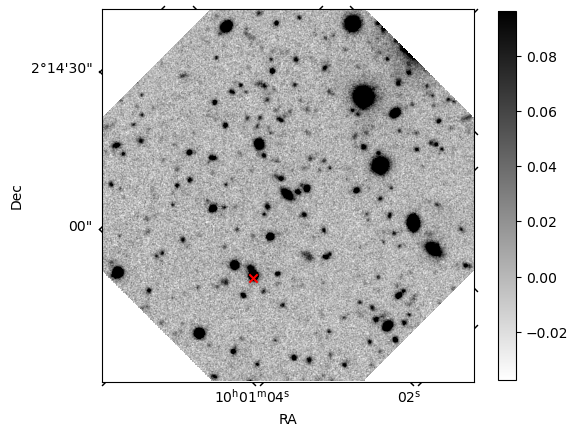

In [48]:
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs
from scipy.ndimage import rotate
from wcs import transform_wcs
import numpy as np
rot_angle = 45
# rot = rotate(cutout.data, -rot_angle)
# y, x = rot.shape
# y, x = (rot.shape[0]-1)/2, (rot.shape[1]-1)/2

output_wcs = transform_wcs(cutout.wcs, rotation=np.deg2rad(rot_angle))
# output_header['NAXIS'] = 2
array = reproject_interp(cutout.hdu, output_wcs, shape_out=np.array(cutout.shape), return_footprint=False)
new_cutout = AstroImage(data=array, header=output_wcs.to_header())
fig, ax = new_cutout.preview()
ax.scatter(150.2611322, 2.2226622, transform=ax.get_transform('world'), marker='x', color='red')

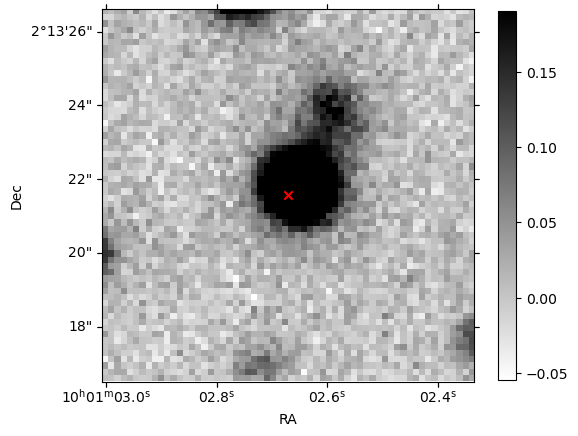

In [54]:
fig, ax = cutout.cutout(coord=(150.2611322, 2.2226622), size=10).preview()
ax.scatter(150.2611322, 2.2226622, transform=ax.get_transform('world'), marker='x', color='red')

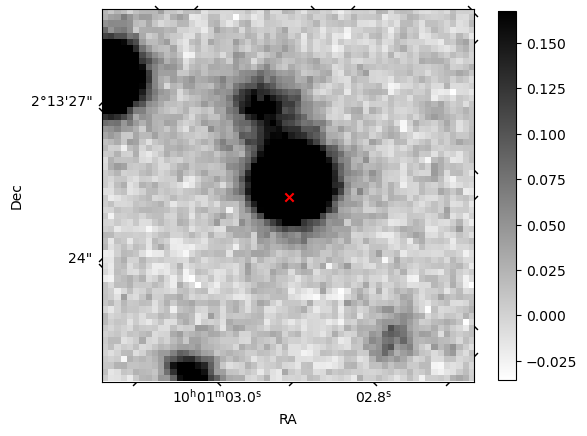

In [55]:
fig, ax = new_cutout.cutout(coord=(150.2611322, 2.2226622), size=10).preview()
ax.scatter(150.2611322, 2.2226622, transform=ax.get_transform('world'), marker='x', color='red')

In [26]:
# from scipy.ndimage import rotate
# from wcs import transform_wcs
# import numpy as np
# rot_angle = 45
# rot = rotate(cutout.data, -rot_angle)
# y, x = (rot.shape[0]-1)/2, (rot.shape[1]-1)/2

# new_cutout = AstroImage(data=rot, header=transform_wcs(cutout.wcs, rotation=np.deg2rad(rot_angle)).to_header()).cutout(coord=[y, x], size=100, coord_unit='pix')
# fig, ax = new_cutout.preview()
# ax.scatter(150.2611322, 2.2226622, transform=ax.get_transform('world'), marker='x', color='red')